# Time Series Analysis-ARIMA MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/TSA-ARIMA-Assignmeent 1/sales_train.csv")
test = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/TSA-ARIMA-Assignmeent 1/test.csv")
shops = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/TSA-ARIMA-Assignmeent 1/shops.csv")
items = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/TSA-ARIMA-Assignmeent 1/items.csv")
item_cats = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/TSA-ARIMA-Assignmeent 1/item_categories.csv")

In [3]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
print("sales shape: ",sales.shape)
print("test shape: ",test.shape)
print("shops shape: ",shops.shape)
print("items shape: ",items.shape)
print("item_cats shape: ",item_cats.shape)

sales shape:  (2935849, 6)
test shape:  (214200, 3)
shops shape:  (60, 2)
items shape:  (22170, 3)
item_cats shape:  (84, 2)


In [9]:
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

In [11]:
monthly_sales_df = sales.groupby(['date','date_block_num','shop_id'])['date','item_price','item_cnt_day'].agg({'date':['min','max'], 'item_price':'mean', 'item_cnt_day':'sum'})

In [12]:
monthly_sales_df.head()

date              item_price  \
                                         min        max         mean   
date       date_block_num shop_id                                      
2013-01-01 0              2       2013-01-01 2013-01-01  1360.304348   
                          7       2013-01-01 2013-01-01   673.505747   
                          8       2013-01-01 2013-01-01   898.291667   
                          13      2013-01-01 2013-01-01   207.285714   
                          14      2013-01-01 2013-01-01   727.883333   

                                  item_cnt_day  
                                           sum  
date       date_block_num shop_id               
2013-01-01 0              2               24.0  
                          7               89.0  
                          8               50.0  
                          13              31.0  
                          14              66.0

[]

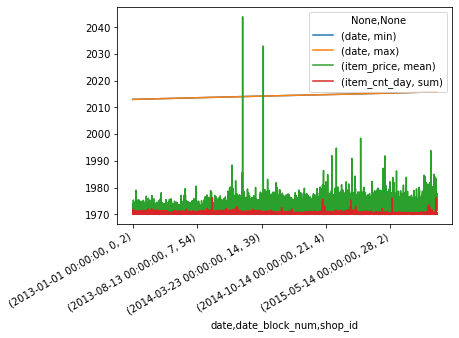

In [13]:
monthly_sales_df.plot()
plt.xticks(rotation=30, horizontalalignment='right')
plt.plot()

In [14]:
item_sold_per_cat = items.groupby('item_category_id').count()

In [15]:
item_sold_per_cat

,item_name,item_id
item_category_id,,
0,4,4
1,2,2
2,75,75
3,34,34
4,15,15
...,...,...
79,1,1
80,6,6
81,7,7


In [16]:
monthly_sales_df.loc[monthly_sales_df.index==(33,59,21427)]

Empty DataFrame
Columns: [(date, min), (date, max), (item_price, mean), (item_cnt_day, sum)]
Index: []

In [17]:
item_sold_per_month = sales.groupby(['date_block_num']).sum()

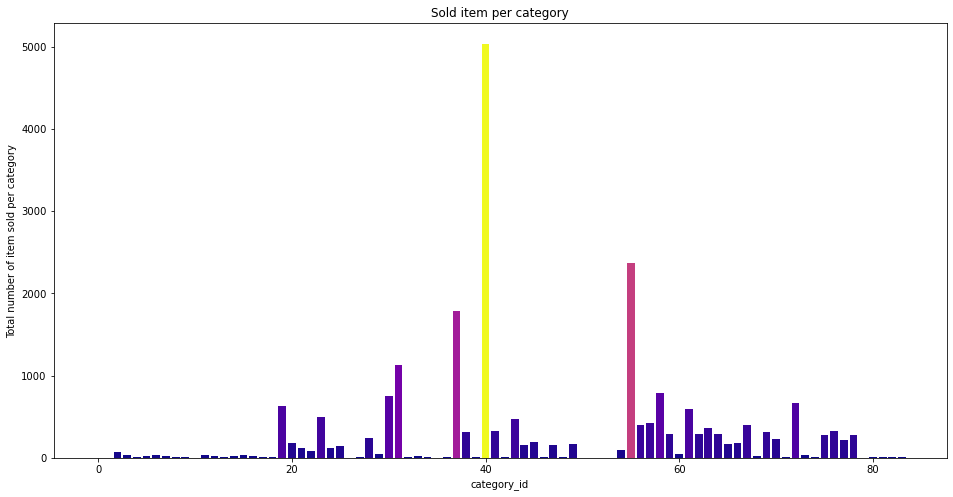

In [18]:
plt.figure(figsize=(16,8))
data_color_normalized = [x / max(item_sold_per_cat['item_id']) for x in item_sold_per_cat['item_id']]
my_cmap = plt.cm.get_cmap('plasma')
colors = my_cmap(data_color_normalized)

plt.bar(item_sold_per_cat.index, item_sold_per_cat['item_id'], color=colors)
plt.title('Sold item per category')
plt.xlabel('category_id')
plt.ylabel('Total number of item sold per category')
plt.show()

Text(0, 0.5, 'Total amount of sale')

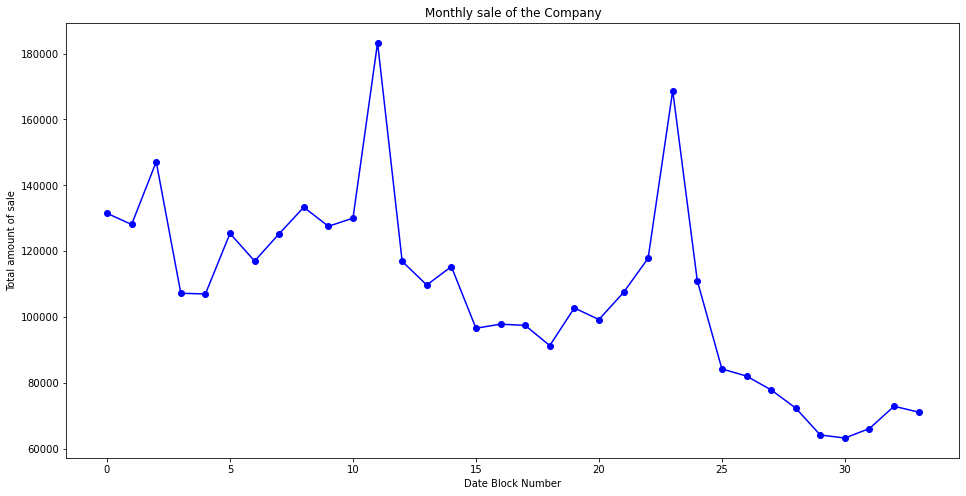

In [19]:
plt.figure(figsize=(16,8))
plt.plot(item_sold_per_month['item_cnt_day'], 'bo-')
plt.title('Monthly sale of the Company')
plt.xlabel('Date Block Number')
plt.ylabel('Total amount of sale')

<Figure size 1152x576 with 0 Axes>

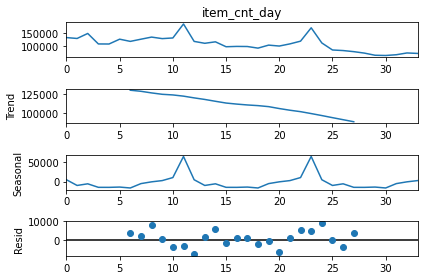

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
additive_result = seasonal_decompose(item_sold_per_month['item_cnt_day'], model='additive', period=12)
plt.figure(figsize=(16,8))
additive_result.plot()
plt.show()

<Figure size 1152x576 with 0 Axes>

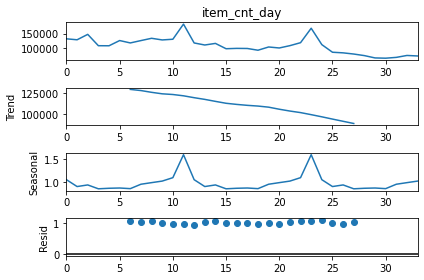

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
mul_reuslt = seasonal_decompose(item_sold_per_month['item_cnt_day'], model='multiplicative',period=12)
plt.figure(figsize=(16,8))
mul_reuslt.plot()
plt.show()

# Checking for Stationary

In [23]:
monthly_sales = item_sold_per_month['item_cnt_day'].values

In [24]:
monthly_sales

array([131479., 128090., 147142., 107190., 106970., 125381., 116966.,
       125291., 133332., 127541., 130009., 183342., 116899., 109687.,
       115297.,  96556.,  97790.,  97429.,  91280., 102721.,  99208.,
       107422., 117845., 168755., 110971.,  84198.,  82014.,  77827.,
        72295.,  64114.,  63187.,  66079.,  72843.,  71056.])

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

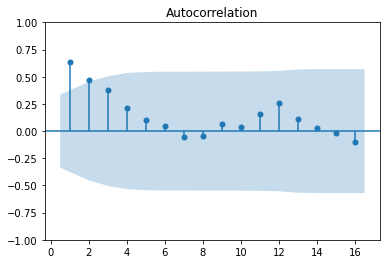

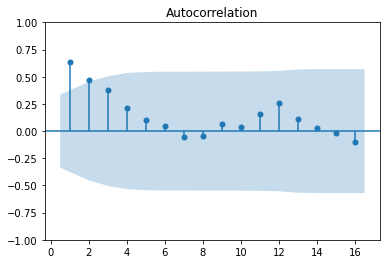

In [27]:
plot_acf(monthly_sales, zero=False)

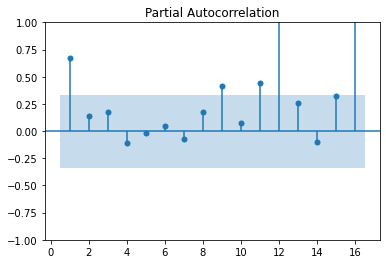

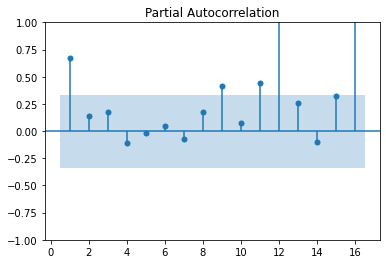

In [60]:
plot_pacf(monthly_sales, zero=False, method='ols')

# augumented dickey-fuller test

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adfuller_res = adfuller(monthly_sales)
print('ADF Statistic: %f' % adfuller_res[0])
print('p-value: %f' % adfuller_res[1])
print('Critical Values:')
for key, value in adfuller_res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.395704
p-value: 0.142953
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [32]:
monthy_sales_log = np.log(monthly_sales)
adfuller_res_log = adfuller(monthy_sales_log)
print('ADF Statistic: %f' % adfuller_res_log[0])
print('p-value: %f' % adfuller_res_log[1])
print('Critical Values:')

for key, value in adfuller_res_log[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.738099
p-value: 0.411597
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


# ARIMA Model

In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
ar_model_1 = ARIMA(monthy_sales_log, order=(1,0,0))
result_model_1 = ar_model_1.fit()
result_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  12.926
Date:                Sat, 21 Jan 2023   AIC                            -19.851
Time:                        20:30:10   BIC                            -15.272
Sample:                             0   HQIC                           -18.290
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5360      0.157     73.273      0.000      11.227      11.845
ar.L1          0.7958      0.109      7.274      0.000       0.581       1.010
sigma2         0.0266      0.006      4.255      0.000       0.014       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.69   Prob(JB):                         0.65
Heteroskedasticity (H):               2.41   Skew:                             0.31
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
ar_model_2 = ARIMA(monthy_sales_log, order=(2,0,0))
result_model_2 = ar_model_2.fit()
result_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  13.050
Date:                Sat, 21 Jan 2023   AIC                            -18.100
Time:                        20:12:11   BIC                            -11.995
Sample:                             0   HQIC                           -16.018
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5334      0.172     67.209      0.000      11.197      11.870
ar.L1          0.7292      0.134      5.462      0.000       0.468       0.991
ar.L2          0.0866      0.170      0.509      0.611      -0.247       0.420
sigma2         0.0264      0.006      4.320      0.000       0.014       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.94   Prob(JB):                         0.57
Heteroskedasticity (H):               2.58   Skew:                             0.37
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""